In [28]:
###############################################################
#
# Consumer-Resource model with production.
# Produces eigenvalue plots for symmetric and asymmetric P
# matrices.
# Each resource density = r
# Each species abundance = s
# Consumption matrix C = c*I 
#
################################################################

In [29]:
import numpy as np
from numpy.random import normal, uniform
from numpy.linalg import eigvals
import math as mt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"          

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

%matplotlib inline

np.set_printoptions(precision=5)

In [30]:
## Asymmetric P matrix ##

def asymP(sig, n):

    return abs(normal(0, sig, (n, n)))

In [31]:
## Symmetric P matrix ##

def symP(sig, n):
    
    P = np.empty((n, n))
    for i in range(n):
        for j in range(i + 1):
            P[j][i] = P[i][j] = abs(normal(0, sig))
    
    return P

In [36]:
sev = np.array([])
aev = np.array([]) 

## Parameters ##
  
n   = 20      
eps = 0.25
sig = 1 
c   = 1

I = np.identity(n)

## Consumption Matrix ##

C = c * I

## Production matrices ##

sP = symP(sig, n)
aP = asymP(sig, n)

rlb = n * sig * mt.sqrt(2 / mt.pi) / (c * eps)

for k in range(5000):
    
    ## Abundances ##
        
    r = uniform(rlb, 10 * rlb)    
    s = uniform(rlb / 10**4, rlb / 1000)
    
    ## Linearized System ##
    
    LA  = -c * s * I
    sLB = sP - c * r * I
    aLB = aP - c * r * I

    LC = eps * c * s * I
    LD = np.zeros((n, n))

    sL  = np.vstack((np.hstack((LA, sLB)), np.hstack((LC, LD))))
    aL  = np.vstack((np.hstack((LA, aLB)), np.hstack((LC, LD))))
    
    ## Eigenvalues of Linearized System ##
    
    sev = np.append(sev, eigvals(sL))
    aev = np.append(aev, eigvals(aL))    

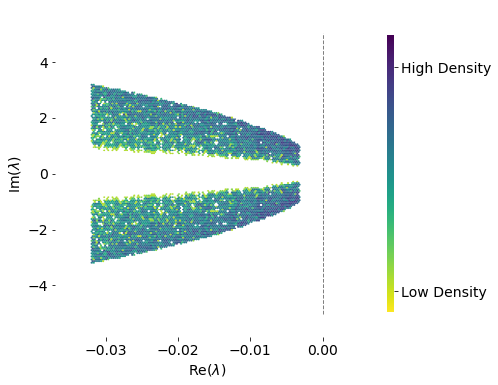

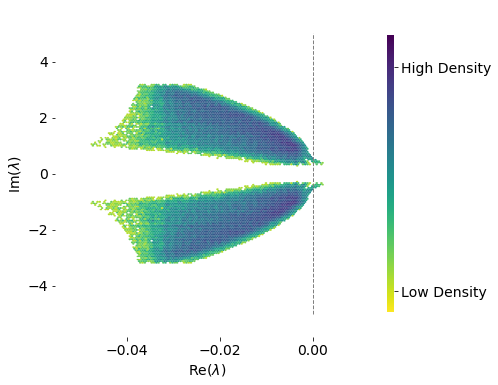

In [37]:
## Plot eigenvalues of linearized system ##

for i, q in enumerate([sev, aev]):

    x = q.real
    y = q.imag

    plt.rcParams["axes.edgecolor"] = "white"
    plt.rcParams["axes.linewidth"] = 0    
    
    fig, ax = plt.subplots(figsize = (7, 6))

    cmap = plt.cm.viridis_r

    cmap.set_under(color = 'white') 

    plt.axvline(0, c='grey', linestyle='--', linewidth=1, 
                ymin=0.07, ymax=0.93)

    font = {'size' : 14}
    plt.rc('font', **font)

    plt.hexbin(x, y, bins='log', cmap=cmap, linewidths=0.1)

    plt.xlabel(r'Re($\lambda$)')
    plt.ylabel(r'Im($\lambda$)')

    plt.clim(10**(-8), 2.6)

    xmin, xmax = plt.xlim()
    nxm = (xmax - xmin) / 10
    plt.xlim((xmin - nxm, xmax + nxm))

    if i==0:
        loc = plticker.MultipleLocator(base=0.01) 
        ax.xaxis.set_major_locator(loc)            
    if i==1:
        loc = plticker.MultipleLocator(base=0.02) 
        ax.xaxis.set_major_locator(loc)

    ymin, ymax = plt.ylim()
    nym = (ymax - ymin) / 3
    plt.ylim((ymin - nym, ymax + nym))

    cb = plt.colorbar(aspect=40, shrink=0.85, pad=0.07)
    locs = cb.get_ticks()
    tl = locs[-1] * 2 / 25
    cb.set_ticks([tl, locs[-1] - tl])
    cb.set_ticklabels(['Low Density', 'High Density'])
        
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


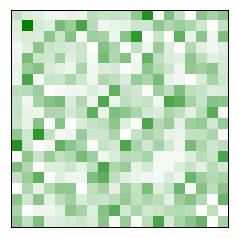

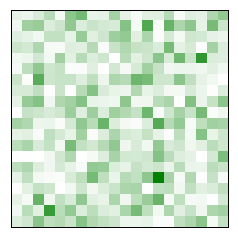

In [38]:
### Plot Grid Representing Production Matrix P ###

for i, M in enumerate([sP, aP]):
    
    c_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                               ['white', 'green'],
                                               256)
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    fig, ax = plt.subplots()

    img = plt.imshow(M, interpolation='nearest',
                    cmap=c_map)

    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.tick_params(axis = 'both',          
                    which = 'both',      
                    bottom = 'off',      
                    top = 'off',         
                    labelbottom = 'off',
                    left = 'off',
                    right = 'off')

    ax.grid(False)
plt.show();

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


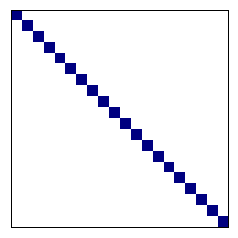

In [35]:
### Plot grid representing consumption C ###

C = c*I

for M in [C]:
    c_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                               ['white', 'navy'],
                                               256)
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    fig, ax = plt.subplots()

    img = plt.imshow(M, interpolation='nearest',
                        cmap=c_map)


    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.tick_params(axis='both',          
                    which='both',      
                    bottom='off',      
                    top='off',         
                    labelbottom='off',
                    left='off',
                    right='off')

    ax.grid(False)
